# Distâncias Até a Estação de Metrô Mais Próxima

## Fonte de Dados

http://www.data.rio/
http://www.data.rio/datasets/7a0b22723c5a458faaae79f046163504_19
https://opendata.arcgis.com/datasets/7a0b22723c5a458faaae79f046163504_19.geojson

In [1]:
%matplotlib inline
import geopandas as gpd

In [4]:
metro = gpd.read_file('../01.Dados/Transporte/Metrô/Estações_Metrô.geojson')

In [5]:
metro

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (-43.36484818699684 -22.80661994460496)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.35845219284542 -22.81626620939826)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34964247534861 -22.82451848014957)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.34325654364894 -22.83147525097912)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.33386102638136 -22.84268515051918)
5,6,6,Irajá,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (-43.32329318627627 -22.84795033714736)
6,7,7,Vicente de Carvalho,1,1.0,0.0,0,1,None,1,...,0,0,1,Transcarioca,0,None,0,None,1996,POINT (-43.31305971270195 -22.85406337290664)
7,8,8,Tomaz Coelho,0,0.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1996,POINT (-43.30676191481164 -22.86240349705848)
8,9,9,Engenho da Rainha,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1991,POINT (-43.29740751298672 -22.86785011778942)
9,10,10,Inhauma,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1983,POINT (-43.28336903058594 -22.87455854735933)


### Identificando o CRS

In [6]:
metro.crs

{'init': 'epsg:4326'}

### Modificando CRS 

In [7]:
# igualando crs com os outros dados
metro = metro.to_crs('+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs')

In [8]:
# Visualizando o novo CRS
metro.crs

'+proj=utm +zone=23 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=km +no_defs'

In [10]:
# Visualizando a nova geometria do GeoDataFrame
metro

,OBJECTID,Cod,Nome,Flg_ATM,Flg_Bicicletario,Flg_Elevador,Flg_Linha1,Flg_Linha2,Obs,Flg_Ativa,...,Integra_Trem,Integra_Onibus,Integra_BRT,Corredor,Integra_VLT,Onibus,Flg_Metro_Superficie,Metro_Superficie,Data_Inauguracao,geometry
0,1,1,Pavuna,1,1.0,1.0,0,1,None,1,...,1,0,0,None,0,None,0,None,1998,POINT (667.8266587079571 7476.958648592184)
1,2,2,Engenheiro Rubens Paiva,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (668.4713812680603 7475.883246919416)
2,3,3,Acari / Fazenda Botafogo,0,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (669.3654835201804 7474.959400067788)
3,4,4,Coelho Neto,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.0123144426847 7474.181737448057)
4,5,5,Colégio,1,1.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (670.9626446079112 7472.929607437317)
5,6,6,Irajá,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1998,POINT (672.0406025978053 7472.334302590909)
6,7,7,Vicente de Carvalho,1,1.0,0.0,0,1,None,1,...,0,0,1,Transcarioca,0,None,0,None,1996,POINT (673.083091970513 7471.645424166878)
7,8,8,Tomaz Coelho,0,0.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1996,POINT (673.7187844531575 7470.714501375228)
8,9,9,Engenho da Rainha,1,0.0,0.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1991,POINT (674.6717370541983 7470.100329858508)
9,10,10,Inhauma,1,1.0,1.0,0,1,None,1,...,0,0,0,None,0,None,0,None,1983,POINT (676.1036167399641 7469.340777854449)


## Plotando o mapa

In [11]:
# importando dado do mapa do Rio de Janeiro e os pontos (DATASET)
rj = gpd.read_file('../01.Dados/Mapas/RJ-MUNIC/RJ-MUNIC.shp')
geo_dados = gpd.read_file('../01.Dados/Mapas/RJ-DATASET/DATASET.shp')

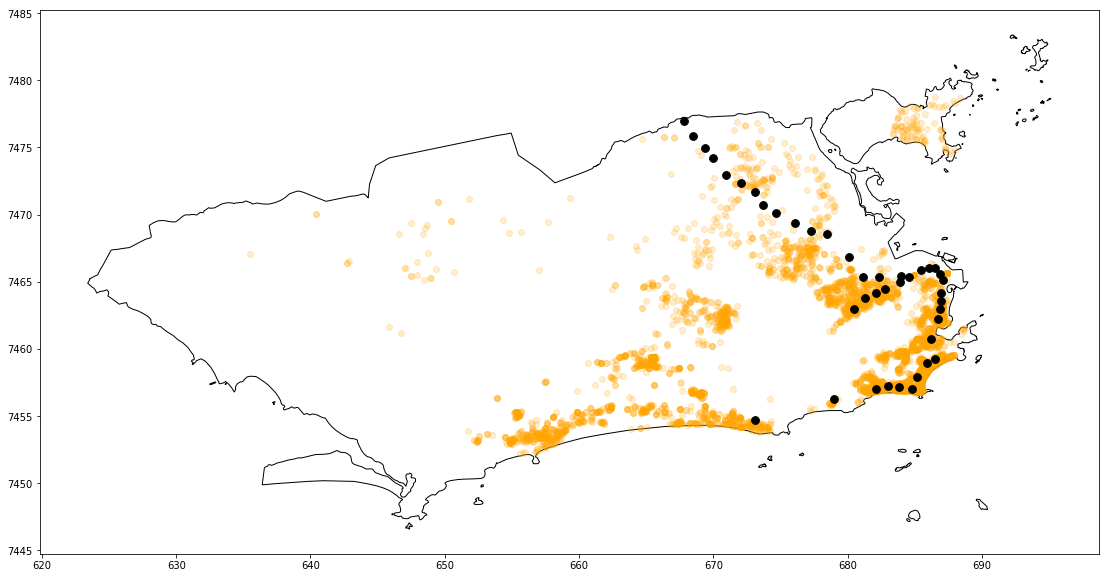

In [13]:
# plotando a cidade do Rio de Janeiro
base = rj.plot(color = 'white', edgecolor = 'black', figsize = (20, 10)) 
# Plotando os apartamentos na cidade do Rio de Janeiro
geo_dados.plot(ax = base, color = 'orange', alpha = 0.2)
# Plotando os metrôs
metro.plot(ax = base, color = 'black', markersize = 60)